# Logistic Regression and Support Vector Machine (SVM)
Lab 5
Code by xbwei, adapted for use by daviscj & mathi2ma


## Import and Prepare the Data

pandas provides excellent data reading and querying module,dataframe, which allows you to import structured data and perform SQL-like queries. We also use the mglearn package to help us visualize the data and models.
Here we imported some house price records from Trulia. For more about extracting data from Trulia, please check my previous tutorial.

We used the house type as the dependent variable and the house ages and house prices as the independent variables.

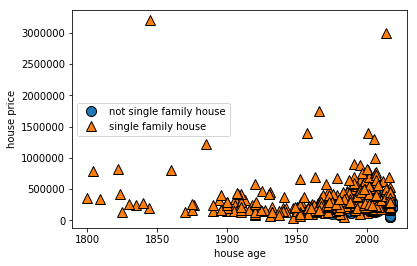

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import mglearn

df = pandas.read_excel('house_price_label.xlsx')

# combine multipl columns into a 2D array
# also convert the integer data to float data
X = np.column_stack((df.built_in.astype(float),df.price.astype(float))) 
y = df.is_single
mglearn.discrete_scatter(X[:,0],X[:,1],y) # use mglearn to visualize data

plt.legend(['not single family house','single family house'])
plt.xlabel('house age')
plt.ylabel('house price')
plt.show()


# Logistic Regression

We use the Logistic Regression model to classify the house types based on the house ages and prices. We also calculate the Accuracy and the Kappa score of our classification on the training data.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
logreg = LogisticRegression().fit(X,y)
y_predict = logreg.predict(X)

print ("Training Set Accuracy: {:.3f}".format(logreg.score(X, y)))
print ("Training Set Kappa: {:.3f}".format(cohen_kappa_score(y,y_predict)))

Training Set Accuracy: 0.765
Training Set Kappa: 0.078



let's visualize the decision boundary which is linear in the logistic regression model.

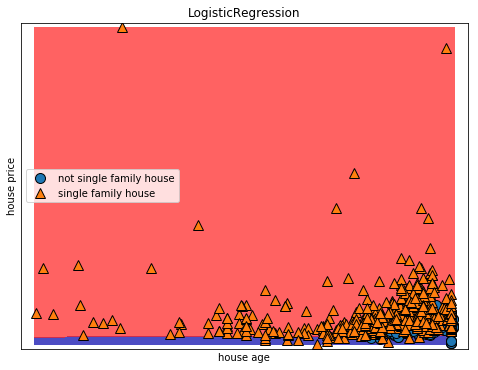

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
mglearn.plots.plot_2d_separator(logreg, X, fill=True, eps=0.5,ax=ax, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
plt.title("{}".format(logreg.__class__.__name__))
plt.xlabel("house age")
plt.ylabel("house price")
plt.legend(['not single family house','single family house'])

We can add a penalty to regularize the logistic regression model. Here we choose the L1 (Lasso). The C parameter is a regularization parameter where a small C means a very restricted model.

Training accuracy of l1 logreg with C=1.00: 0.76
Training kappa: 0.078
Training accuracy of l1 logreg with C=100.00: 0.77
Training kappa: 0.109
Training accuracy of l1 logreg with C=10000.00: 0.77
Training kappa: 0.109


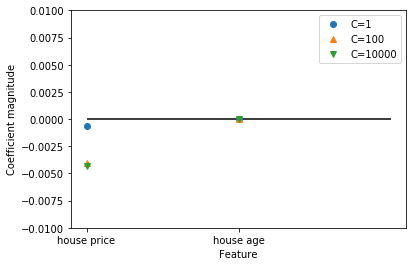

In [5]:
for C, marker in zip([1, 100, 10000], ['o', '^', 'v']): # use different C parameters
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X, y) # select l1 regularization
    print("Training accuracy of l1 logreg with C={:.2f}: {:.2f}".format(C, lr_l1.score(X, y)))
    print ("Training kappa: {:.3f}".format(cohen_kappa_score(y,lr_l1.predict(X))))
    plt.plot(lr_l1.coef_.T, marker, label="C={}".format(C))

plt.xticks(range(X.shape[1]), ['house price','house age'])
plt.hlines(0, 0,X.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-0.01, 0.01)
plt.legend()

# Support Vector Machine (SVM)

We can also use the Support Vector Machine to classify the house types based on same features, and report the Accuracy and the Kappa score of our classification on the training data.

## Linear Support Vector Machine

Similar to the logistic model, the Linear Support Vector Machine classify samples based on a linear decision boundary.

In [6]:
from sklearn.svm import LinearSVC
from sklearn.metrics import cohen_kappa_score
linear_svm = LinearSVC().fit(X,y)
y_predict = linear_svm.predict(X)

print ("Training Set Accuracy: {:.3f}".format(linear_svm.score(X, y)))
print ("Training Set Kappa: {:.3f}".format(cohen_kappa_score(y,y_predict)))

Training Set Accuracy: 0.779
Training Set Kappa: 0.075


SVM prefers scaled data, thus scale your data before using SVM to improve the model performance.

In [7]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
linear_svm = LinearSVC().fit(X_scaled,y)
y_predict = linear_svm.predict(X_scaled)

print ("Training Set Accuracy: {:.3f}".format(linear_svm.score(X_scaled, y)))
print ("Training Set Kappa: {:.3f}".format(cohen_kappa_score(y,y_predict)))

Training Set Accuracy: 0.798
Training Set Kappa: 0.402
